In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

tps = pd.read_csv(
    "avg_HC3_knowledge_pearson_corr_feats.csv", parse_dates=["time"]
).drop("Unnamed: 0", axis=1)
print(tps.shape)
print(tps.columns)

(36000, 22)
Index(['Person', 'Organization', 'Location', 'Work', 'Time', 'Opinion',
       'Sentiment classification [negative, neutral, positive]', 'words',
       'ner', 're', 'fn', 'argument', 'rouge-1-p', 'rouge-1-r', 'rouge-1-f',
       'rouge-2-p', 'rouge-2-r', 'rouge-2-f', 'rouge-l-p', 'rouge-l-r',
       'rouge-l-f', 'time'],
      dtype='object')


In [24]:
day1 = "01-18"
day2 = "03-05"
day3 = "04-09"
gps1 = tps[tps['time'] == day1]
gps2 = tps[tps['time'] == day2]
gps3 = tps[tps['time'] == day3]
print(gps1.shape)
print(gps1.columns)
print("### ne ###")
print(gps1["Person"][4])
print("### re ###")
print(gps1["re"][0])
print("$" * 8)
print("### op ###")
print(gps1["Opinion"][0])
print("### sentiment ###")
print(gps1["Sentiment classification [negative, neutral, positive]"][0])
print("$" * 8)
print("### fn ###")
print(gps1["fn"][4])
print("### argument ###")
print(gps1["argument"][0])

(1000, 22)
Index(['Person', 'Organization', 'Location', 'Work', 'Time', 'Opinion',
       'Sentiment classification [negative, neutral, positive]', 'words',
       'ner', 're', 'fn', 'argument', 'rouge-1-p', 'rouge-1-r', 'rouge-1-f',
       'rouge-2-p', 'rouge-2-r', 'rouge-2-f', 'rouge-l-p', 'rouge-l-r',
       'rouge-l-f', 'time'],
      dtype='object')
### ne ###
[{'text': 'Wright', 'start': 10, 'end': 16, 'probability': 0.7846142360260302}]
### re ###
[{'head_entity': {'start': 16, 'end': 19, 'mention': 'New York Times'}, 'tail_entity': {'start': 43, 'end': 45, 'mention': 'United States'}, 'relations': ['http://www.wikidata.org/prop/direct/P17']}, {'head_entity': {'start': 26, 'end': 29, 'mention': 'New York Times'}, 'tail_entity': {'start': 43, 'end': 45, 'mention': 'United States'}, 'relations': ['http://www.wikidata.org/prop/direct/P17']}, {'head_entity': {'start': 62, 'end': 65, 'mention': 'New York Times'}, 'tail_entity': {'start': 43, 'end': 45, 'mention': 'United States'}, 'r

########
knowledge feature: Person
len: 148
list 0 instance: Wright
most common feature: John Smith
########
knowledge feature: Organization
len: 829
list 0 instance: New York Times
most common feature: ISIS
########
knowledge feature: Location
len: 811
list 0 instance: United States
most common feature: United States
########
knowledge feature: Work
len: 28
list 0 instance: saved and re
most common feature: The Mona Lisa
########
knowledge feature: Time
len: 142
list 0 instance: an extended period of time
most common feature: night
########
knowledge feature: re
len: 2743
list 0 instance: http://www.wikidata.org/prop/direct/P17
most common feature: http://www.wikidata.org/prop/direct/P279
['Person', 'Time', 'Organization', 're', 'Location', 'Work']
########
knowledge feature: Person
len: 122
list 0 instance: Wright
most common feature: Jesus
########
knowledge feature: Organization
len: 632
list 0 instance: The New York Times
most common feature: Apple


/tmp/ipykernel_5139/2045364861.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


########
knowledge feature: Location
len: 724
list 0 instance: humans
most common feature: Earth
########
knowledge feature: Work
len: 25
list 0 instance: higher-quality work
most common feature: work
########
knowledge feature: Time
len: 135
list 0 instance: some point in time
most common feature: night
########
knowledge feature: re
len: 1977
list 0 instance: http://www.wikidata.org/prop/direct/P31
most common feature: http://www.wikidata.org/prop/direct/P47
['Person', 'Time', 'Organization', 're', 'Location', 'Work']


/tmp/ipykernel_5139/2045364861.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


########
knowledge feature: Person
len: 120
list 0 instance: Wright
most common feature: Jesus
########
knowledge feature: Organization
len: 345
list 0 instance: NY Times
most common feature: Apple
########
knowledge feature: Location
len: 544
list 0 instance: United States
most common feature: Earth
########
knowledge feature: Work
len: 23
list 0 instance: NY Times
most common feature: NY Times
########
knowledge feature: Time
len: 110
list 0 instance: school hours
most common feature: time
########
knowledge feature: re
len: 1366
list 0 instance: http://www.wikidata.org/prop/direct/P279
most common feature: http://www.wikidata.org/prop/direct/P47
['Person', 'Time', 'Organization', 're', 'Location', 'Work']


/tmp/ipykernel_5139/2045364861.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


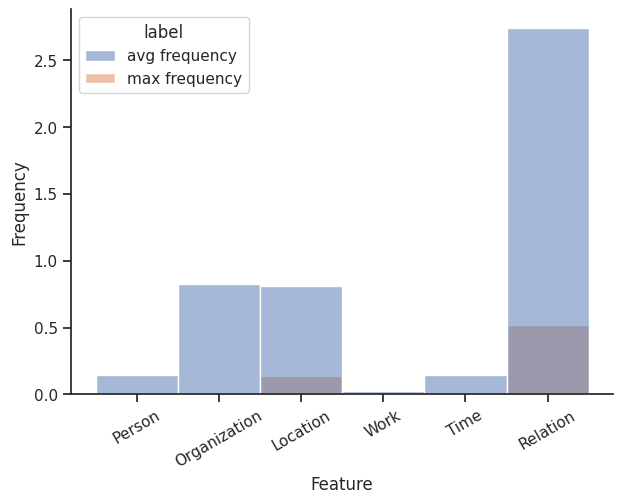

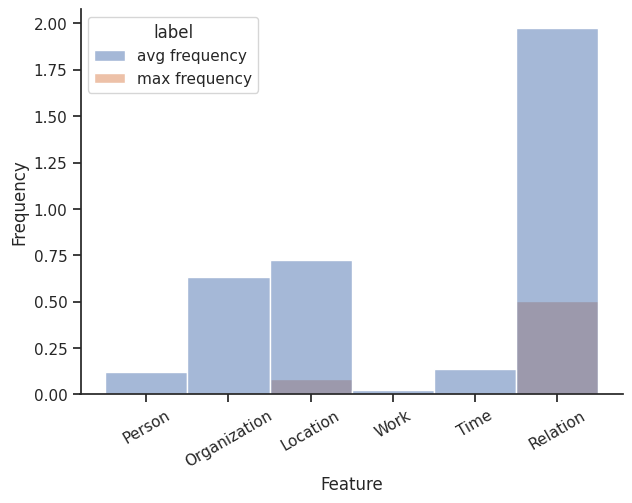

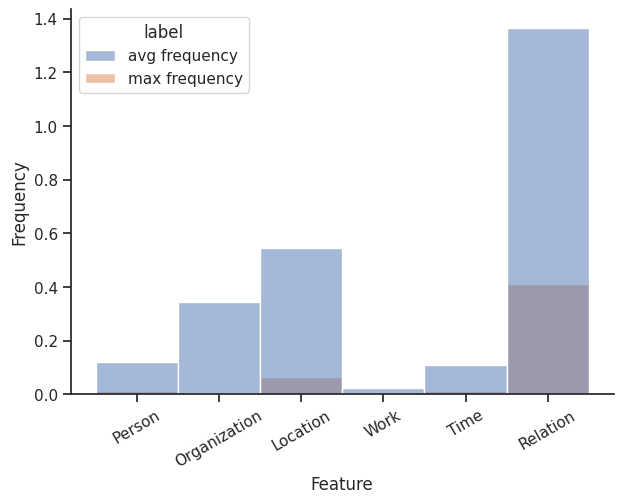

In [38]:
def draw_bar(df, x_names, figsize=(7, 5)):
    # 　设置字体
    sns.set_theme(style="ticks", font='Times New Roman')
    f, ax = plt.subplots(figsize=figsize)
    sns.despine(f)
    # ax = sns.barplot(x="model_names", y="times", hue="Type", data=df, dodge=False)
    sns.histplot(
        df,
        x="feature", hue="label", weights='frequency',
        # multiple="stack",
        # bins=9,
        # edgecolor=".3",
        # linewidth=.5,
    )
    # label
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Feature")
    print(list(set(df["feature"])))
    ax.set_xticklabels(x_names, rotation=30)
    ax.grid(False)


def parse_knowledge(lst, k_type):
    knowledge_text_list = []
    # print(lst)
    # lst = json.loads(lst)
    lst = eval(lst)

    if len(lst) == 0:
        return []
    if k_type in ['Person', 'Organization', 'Location', 'Work', 'Time', 'Opinion',
                  'Sentiment classification [negative, neutral, positive]']:
        knowledge_text_list = [res["text"] for res in lst]
    elif k_type == 're':
        for res in lst:
            knowledge_text_list.extend(res["relations"])
    elif k_type == 'fn':
        knowledge_text_list = [res["frame"] for res in lst]
    elif k_type == 'argument':
        for res in lst:
            for aug in res['argument']:
                knowledge_text_list.append(aug['role'])
    return knowledge_text_list


def raw_df_to_count(df, k_types, date=''):
    # turn features into counts and max frequency for knowledge features
    feature = []
    frequency = []
    label = []
    for k in k_types:
        # knowledge features
        raw_lsts = df[k]
        lst = []
        for raw_lst in raw_lsts:
            lst.extend(parse_knowledge(raw_lst, k))
        # first
        new_key = k
        if date:
            new_key = k + date
        print("#" * 8)
        print("knowledge feature:", k)
        feature.append(new_key)  # 缩写一下
        avg_freq = (len(lst) / 1000)
        frequency.append(avg_freq)
        label.append("avg frequency")
        # second
        feature.append(new_key)
        print("len:", len(lst))
        print("list 0 instance:", lst[0])
        count = Counter(lst)
        ans_dict = count.most_common(1)[0]
        print("most common feature:", ans_dict[0])
        max_freq = ans_dict[1] / 1000
        frequency.append(max_freq)
        # counts[f"#{k[0]}_{ans_dict[0]}"] =
        label.append("max frequency")
    # get features count
    counts = {"feature": feature, "frequency": frequency, "label": label}
    # print(counts)
    df = pd.DataFrame(counts)
    # print(df)
    return df, counts


entity_and_relation = ['Person', 'Organization', 'Location', 'Work', 'Time', 're']
entity_and_relation1 = ['Person', 'Organization', 'Location', 'Work', 'Time', 'Relation']
df, counts = raw_df_to_count(gps1, entity_and_relation)
draw_bar(df, entity_and_relation1)
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/entity_and_relation-01-18.pdf", bbox_inches='tight')

df, counts = raw_df_to_count(gps2, entity_and_relation)
draw_bar(df, entity_and_relation1)
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/entity_and_relation-03-05.pdf", bbox_inches='tight')

df, counts = raw_df_to_count(gps3, entity_and_relation)
draw_bar(df, entity_and_relation1)
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/entity_and_relation-04-09.pdf", bbox_inches='tight')

########
knowledge feature: Opinion
len: 1158
list 0 instance: widely considered
most common feature: hope
########
knowledge feature: Sentiment classification [negative, neutral, positive]
len: 1000
list 0 instance: negative
most common feature: negative
########
knowledge feature: Opinion
len: 1057
list 0 instance: great fun
most common feature: want
########
knowledge feature: Sentiment classification [negative, neutral, positive]
len: 999
list 0 instance: neutral
most common feature: negative
########
knowledge feature: Opinion
len: 740
list 0 instance: still offer
most common feature: want
########
knowledge feature: Sentiment classification [negative, neutral, positive]
len: 987
list 0 instance: neutral
most common feature: negative
['Opinion-03-05', 'Sentiment classification [negative, neutral, positive]-01-18', 'Opinion-01-18', 'Opinion-04-09', 'Sentiment classification [negative, neutral, positive]-04-09', 'Sentiment classification [negative, neutral, positive]-03-05']


/tmp/ipykernel_5139/928089835.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


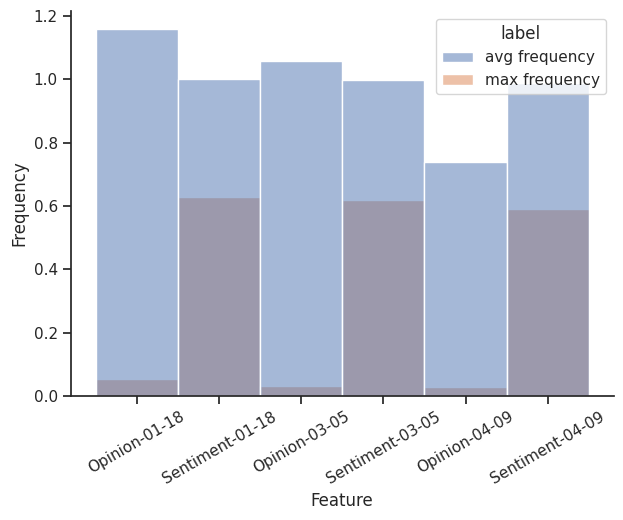

In [34]:
op_st0 = ['Opinion', 'Sentiment classification [negative, neutral, positive]']
# op_st = ['Opinion', 'Sentiment']
# df2, counts2 = raw_df_to_count(gps1, op_st0)
df3, counts3 = raw_df_to_count(gps1, op_st0, '-01-18')
df4, counts4 = raw_df_to_count(gps2, op_st0, '-03-05')
df5, counts5 = raw_df_to_count(gps3, op_st0, '-04-09')
df2 = df3.append([df4, df5], ignore_index=True)
op_st = ['Opinion-01-18', 'Sentiment-01-18', 'Opinion-03-05', 'Sentiment-03-05', 'Opinion-04-09', 'Sentiment-04-09']
draw_bar(df2, op_st)
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/op_st.pdf", bbox_inches='tight')


########
knowledge feature: fn
len: 53871
list 0 instance: Existence
most common feature: Causation
########
knowledge feature: argument
len: 104774
list 0 instance: entity
most common feature: entity
########
knowledge feature: fn
len: 45949
list 0 instance: Text
most common feature: Causation
########
knowledge feature: argument
len: 90356
list 0 instance: author
most common feature: entity
########
knowledge feature: fn
len: 34985
list 0 instance: Existence
most common feature: Causation
########
knowledge feature: argument
len: 69457
list 0 instance: entity
most common feature: entity
0           fn-01-18
1           fn-01-18
2     argument-01-18
3     argument-01-18
4           fn-03-05
5           fn-03-05
6     argument-03-05
7     argument-03-05
8           fn-04-09
9           fn-04-09
10    argument-04-09
11    argument-04-09
Name: feature, dtype: object
['argument-04-09', 'fn-03-05', 'fn-01-18', 'argument-01-18', 'fn-04-09', 'argument-03-05']


/tmp/ipykernel_5139/2045364861.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


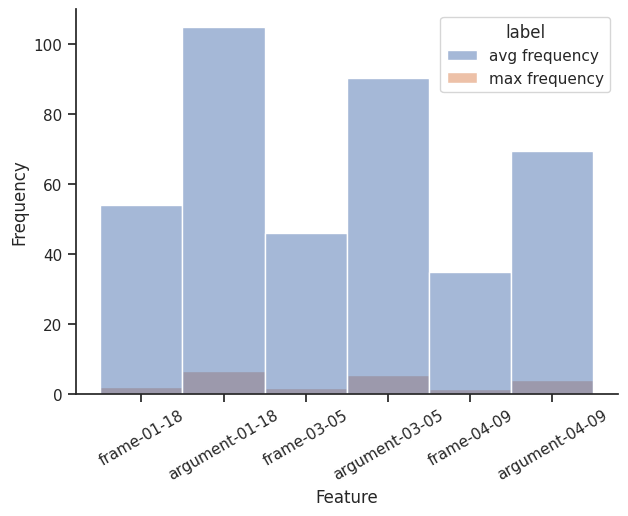

In [49]:
fn_arg = ['fn', 'argument']
df3, counts3 = raw_df_to_count(gps1, fn_arg, '-01-18')
df4, counts4 = raw_df_to_count(gps2, fn_arg, '-03-05')
df5, counts5 = raw_df_to_count(gps3, fn_arg, '-04-09')
fn_arg_new = ['frame-01-18', 'argument-01-18', 'frame-03-05', 'argument-03-05', 'frame-04-09', 'argument-04-09', ]
# df6=pd.concat([df3,df4,df5],axis=1)
df6 = df3.append([df4, df5], ignore_index=True)
print(df6['feature'])
draw_bar(df6, fn_arg_new)
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/fn_argument.pdf", bbox_inches='tight')

########
knowledge feature: Person
len: 148
list 0 instance: Wright
most common feature: John Smith
########
knowledge feature: Organization
len: 829
list 0 instance: New York Times
most common feature: ISIS
########
knowledge feature: Location
len: 811
list 0 instance: United States
most common feature: United States
########
knowledge feature: Work
len: 28
list 0 instance: saved and re
most common feature: The Mona Lisa
########
knowledge feature: Time
len: 142
list 0 instance: an extended period of time
most common feature: night
########
knowledge feature: re
len: 2743
list 0 instance: http://www.wikidata.org/prop/direct/P17
most common feature: http://www.wikidata.org/prop/direct/P279
########
knowledge feature: Person
len: 122
list 0 instance: Wright
most common feature: Jesus
########
knowledge feature: Organization
len: 632
list 0 instance: The New York Times
most common feature: Apple
########
knowledge feature: Location
len: 724
list 0 instance: humans
most common feature: Ea

/tmp/ipykernel_5139/2045364861.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names, rotation=30)


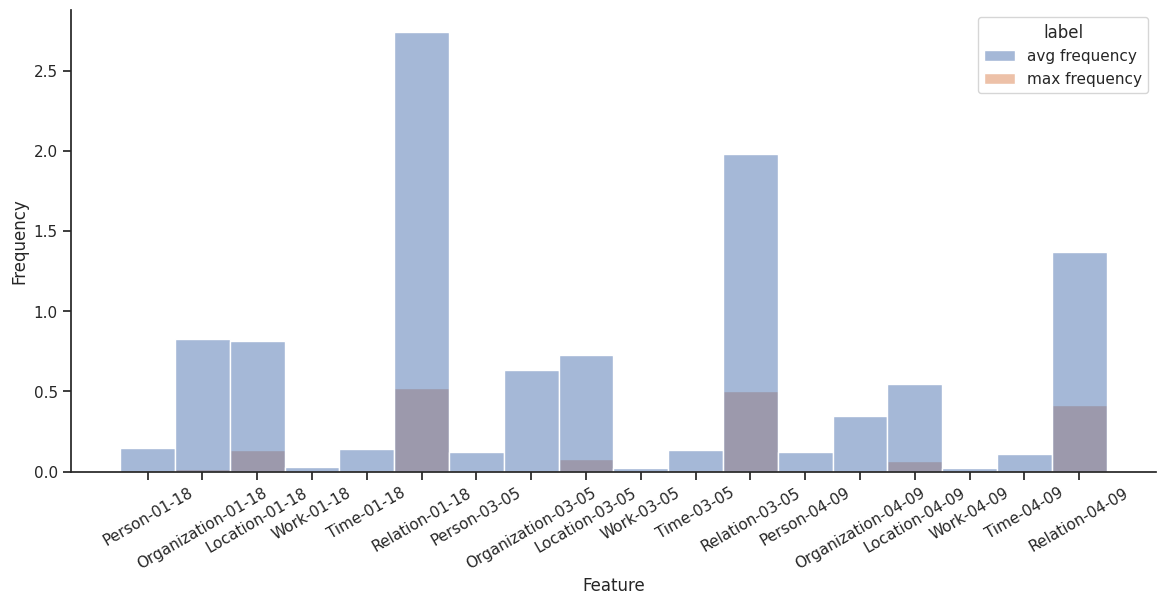

In [48]:
entity_and_relation = ['Person', 'Organization', 'Location', 'Work', 'Time', 're']
entity_and_relation1 = ['Person', 'Organization', 'Location', 'Work', 'Time', 'Relation']
final_keys = []
for suffix in ['-01-18', '-03-05', '-04-09']:
    for k in entity_and_relation1:
        final_keys.append(f"{k}{suffix}")

df3, counts3 = raw_df_to_count(gps1, entity_and_relation, '-01-18')
df4, counts4 = raw_df_to_count(gps2, entity_and_relation, '-03-05')
df5, counts5 = raw_df_to_count(gps3, entity_and_relation, '-04-09')
df2 = df3.append([df4, df5], ignore_index=True)
draw_bar(df2, final_keys, figsize=(14, 6))
plt.savefig("/home/tsq/Desktop/tsinghua23/CK/knowledge/ne_re.pdf", bbox_inches='tight')

